In [0]:
                                     #Project- Air quality index

In [0]:
#giving a file path
filepath ="/FileStore/tables/Air_Quality_Data___2015_2020_.csv"

In [0]:
#reading the file
Air_quality_df = spark.read.csv(filepath,header=True,inferSchema= True)
Air_quality_df.show()

+---------+----------+-----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+----------+
|     City|      Date|PM2.5|PM10|    NO|  NO2|   NOx| NH3|    CO|  SO2|    O3|Benzene|Toluene|Xylene| AQI|AQI_Bucket|
+---------+----------+-----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+----------+
|Ahmedabad|2015-01-01| null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|      null|
|Ahmedabad|2015-01-02| null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|      null|
|Ahmedabad|2015-01-03| null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|      null|
|Ahmedabad|2015-01-04| null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|      null|
|Ahmedabad|2015-01-05| null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|      null|
|Ahmedabad|2015-01-06| null|null| 45.41|38.48|  81.5|nul

In [0]:
#Task 1:To get the data city-wise where the air quality is best.
from pyspark.sql.functions import col
Best_Air_quality_df = df.filter(col("AQI_Bucket") == "Good").groupBy("City").min('AQI')
Best_Air_quality_df.show()

+------------------+--------+
|              City|min(AQI)|
+------------------+--------+
|           Chennai|      30|
|           Lucknow|      39|
|            Mumbai|      40|
|            Aizawl|      18|
|         Ahmedabad|      48|
|          Gurugram|      38|
|      Brajrajnagar|      22|
|           Kolkata|      26|
|         Amaravati|      24|
|          Amritsar|      20|
|          Shillong|      14|
|             Delhi|      29|
|        Chandigarh|      26|
|        Coimbatore|      26|
|            Bhopal|      37|
|Thiruvananthapuram|      32|
|         Bengaluru|      20|
|           Talcher|      13|
|         Hyderabad|      22|
|        Jorapokhar|      27|
+------------------+--------+
only showing top 20 rows



In [0]:
#Now, counting the data city-wise where the air quality is best.
from pyspark.sql.functions import col
Count_Air_quality_df = df.filter(col("AQI_Bucket") == "Good").groupBy("City").count()
Count_Air_quality_df.show()

+------------------+-----+
|              City|count|
+------------------+-----+
|           Chennai|   12|
|           Lucknow|   15|
|            Mumbai|   26|
|            Aizawl|   83|
|         Ahmedabad|    1|
|          Gurugram|   21|
|      Brajrajnagar|   14|
|           Kolkata|  119|
|         Amaravati|  158|
|          Amritsar|   84|
|          Shillong|  111|
|             Delhi|   21|
|        Chandigarh|   48|
|        Coimbatore|   43|
|            Bhopal|    2|
|Thiruvananthapuram|  126|
|         Bengaluru|  115|
|           Talcher|   19|
|         Hyderabad|  141|
|        Jorapokhar|   10|
+------------------+-----+
only showing top 20 rows



In [0]:
#Task 2:To get the data city-wise where the air quality is moderate.
from pyspark.sql.functions import col
City_wise_Air_quality_df = df.filter(col("AQI_Bucket") == "Moderate").groupBy("City").count()
City_wise_Air_quality_df.show()

+------------------+-----+
|              City|count|
+------------------+-----+
|             Kochi|   74|
|             Patna|  507|
|         Ernakulam|   49|
|           Chennai|  804|
|           Lucknow|  578|
|            Mumbai|  285|
|         Ahmedabad|  198|
|          Gurugram|  454|
|      Brajrajnagar|  421|
|           Kolkata|  152|
|         Amaravati|  219|
|          Amritsar|  448|
|          Shillong|   10|
|             Delhi|  519|
|        Chandigarh|   74|
|        Coimbatore|   13|
|            Bhopal|  165|
|Thiruvananthapuram|  154|
|         Bengaluru|  630|
|           Talcher|  324|
+------------------+-----+
only showing top 20 rows



In [0]:
#Task 3: To get the data city-wise where the air quality is worst
from pyspark.sql.functions import col
Worst_Air_quality_df = df.filter(col("AQI_Bucket") == "Severe").groupBy("City").max('AQI')
Worst_Air_quality_df.show()

+----------+--------+
|      City|max(AQI)|
+----------+--------+
|     Patna|     619|
|   Chennai|     449|
|   Lucknow|     707|
| Ahmedabad|    2049|
|  Gurugram|     891|
|   Kolkata|     475|
|  Amritsar|     869|
|     Delhi|     716|
|   Talcher|     570|
| Hyderabad|     737|
|Jorapokhar|     604|
|  Guwahati|     956|
|    Jaipur|     457|
+----------+--------+



In [0]:
#Task4: To get the data single city Where the air quality is worst

from pyspark.sql.functions import max
#Knowing the maximum AQI value
max_aqi = Air_quality_df.select(max('AQI')).first()[0]

#Filtering the DataFrame for the rows with the maximum AQI value
worst_air_quality_single_city_df = Air_quality_df.filter(col('AQI') == max_aqi)

#Displaying the DataFrame
worst_air_quality_single_city_df.show()

+---------+----------+------+----+------+------+------+----+------+----+-----+-------+-------+------+----+----------+
|     City|      Date| PM2.5|PM10|    NO|   NO2|   NOx| NH3|    CO| SO2|   O3|Benzene|Toluene|Xylene| AQI|AQI_Bucket|
+---------+----------+------+----+------+------+------+----+------+----+-----+-------+-------+------+----+----------+
|Ahmedabad|2018-02-19|242.66|null|132.47|199.17|246.03|null|132.47|null|44.06|   0.74|   5.81|  3.21|2049|    Severe|
+---------+----------+------+----+------+------+------+----+------+----+-----+-------+-------+------+----+----------+



In [0]:
#Task 5: To get the data single city Where the air quality is best.

from pyspark.sql.functions import min
#Knowing the maximum AQI value
min_aqi = Air_quality_df.select(min('AQI')).first()[0]

#Filtering the DataFrame for the rows with the maximum AQI value
air_quality_best_single_city_df = Air_quality_df.filter(col('AQI') == min_aqi)

#Displaying the DataFrame
air_quality_best_single_city_df.show()

+-------+----------+-----+----+----+-----+----+-----+----+----+-----+-------+-------+------+---+----------+
|   City|      Date|PM2.5|PM10|  NO|  NO2| NOx|  NH3|  CO| SO2|   O3|Benzene|Toluene|Xylene|AQI|AQI_Bucket|
+-------+----------+-----+----+----+-----+----+-----+----+----+-----+-------+-------+------+---+----------+
|Talcher|2018-10-13| null|0.07|null|51.49|null|23.46|null|3.53|10.33|   null|   null|  null| 13|      Good|
+-------+----------+-----+----+----+-----+----+-----+----+----+-----+-------+-------+------+---+----------+



In [0]:
#Task6:To get the list of chemicals harmful for humans which causes the air quality go bad
result = Air_quality_df.select("NO","NO2","NH3","CO","SO2","O3","Benzene", "Toluene", "Xylene","AQI_Bucket") .where(col("AQI_Bucket").isin("Poor", "Very Poor", "Severe")) .distinct()
result.show()

+-----+-----+----+-----+------+------+-------+-------+------+----------+
|   NO|  NO2| NH3|   CO|   SO2|    O3|Benzene|Toluene|Xylene|AQI_Bucket|
+-----+-----+----+-----+------+------+-------+-------+------+----------+
|18.18|39.56|null|18.18| 80.43| 40.11|  11.29|  24.35|  3.35|    Severe|
|15.96|21.04|null|15.96|  54.7|  36.2|   8.14|  18.75|  2.52|    Severe|
|33.84|36.14|null|33.84|101.53| 40.98|  20.12|  43.51|  7.48|    Severe|
| 8.92| 27.3|null| 8.92| 54.28| 47.42|    0.0|    0.0|  0.27| Very Poor|
| 6.34| 23.8|null| 6.34| 66.58| 53.14|    9.7|   9.63| 16.49| Very Poor|
| 2.37|22.83|null| 2.37| 25.73|  47.3|    0.0|    0.0|   0.0|      Poor|
|54.56|35.31|null|54.56| 55.04|107.38|   0.46|   0.06| 35.61|    Severe|
| 7.29|31.32|null| 7.29| 80.09| 44.76|    0.0|    0.0|   0.0|      Poor|
| 4.32|24.27|null| 4.32| 48.73| 39.94|   0.02|    0.0|  3.55| Very Poor|
|24.39|32.66|null|24.39| 67.39|111.33|   0.24|   0.01|  7.67|    Severe|
|30.61| 28.4|null|30.61| 33.79|  73.6|   0.17|   0.

In [0]:
#Task7:To get the average distribution of chemicals in polluted air (ug/m3)
from pyspark.sql.functions import col, avg,round

Avg_Distribution_Data = Air_quality_df.select("`PM2.5`","PM10","NO", "NO2", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene", "AQI_Bucket") \
    .where(col("AQI_Bucket").isin("Good","Satisfactory","Moderate","Poor", "Very Poor", "Severe")) \
    .groupBy("AQI_Bucket") \
    .agg(round(avg("`PM2.5`"),2).alias("Avg_PM2.5"),
         round(avg("PM10"),2).alias("Avg_PM10"),
         round(avg("NO"),2).alias("Avg_NO"),
         round(avg("NO2"),2).alias("Avg_NO2"),
         round(avg("NH3"),2).alias("Avg_NH3"),
         round(avg("CO"),2).alias("Avg_CO"),
         round(avg("SO2"),2).alias("Avg_SO2"),
         round(avg("O3"),2).alias("Avg_O3"),
         round(avg("Benzene"),2).alias("Avg_Benzene"),
         round(avg("Toluene"),2).alias("Avg_Toluene"),
         round(avg("Xylene"),2).alias("Avg_Xylene"))

Avg_Distribution_Data.show()

+------------+---------+--------+------+-------+-------+------+-------+------+-----------+-----------+----------+
|  AQI_Bucket|Avg_PM2.5|Avg_PM10|Avg_NO|Avg_NO2|Avg_NH3|Avg_CO|Avg_SO2|Avg_O3|Avg_Benzene|Avg_Toluene|Avg_Xylene|
+------------+---------+--------+------+-------+-------+------+-------+------+-----------+-----------+----------+
|        Good|    16.12|   33.12|  6.24|  12.64|  12.13|  0.49|    7.8| 19.38|       4.12|        4.9|      2.24|
|      Severe|   188.28|  334.42| 47.64|  67.75|   47.9| 18.99|  43.27| 42.26|       6.23|      29.51|      5.86|
|   Very Poor|   160.24|  283.96| 35.33|  46.11|  37.77|   3.4|  20.34|  39.2|       3.74|      13.91|       5.1|
|Satisfactory|    30.55|   63.11| 10.17|   19.5|  19.75|  0.79|    9.1| 28.33|       3.36|       6.05|      2.64|
|        Poor|    96.78|  202.63| 22.92|  36.08|  29.22|   2.3|  17.27| 41.18|       3.63|      10.73|      3.15|
|    Moderate|    56.67|  123.16| 15.21|  27.55|  24.94|  1.29|  13.31|  39.0|       2.8

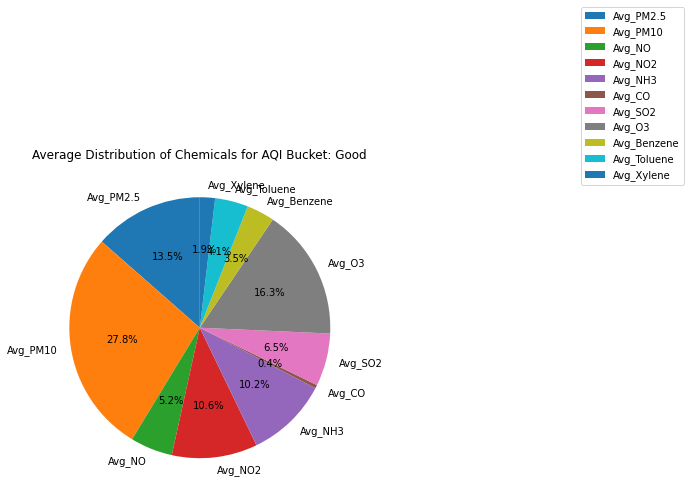

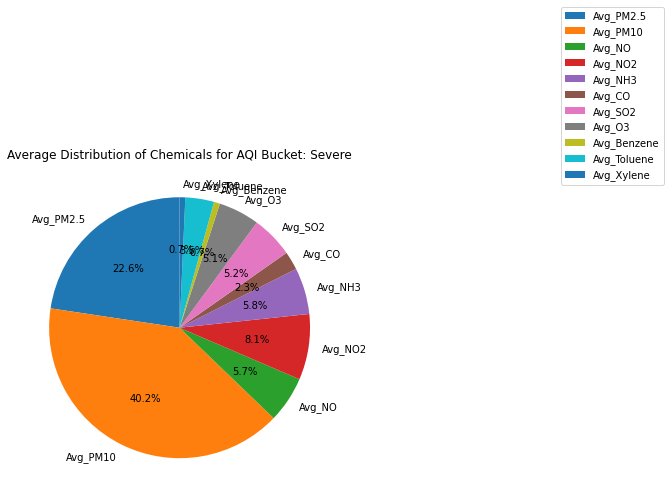

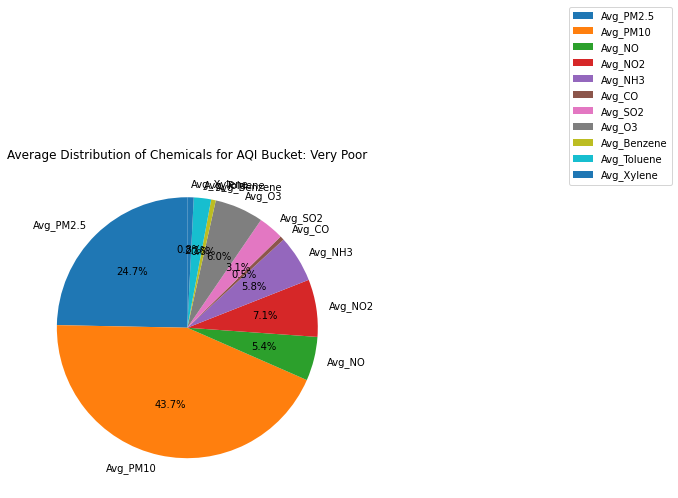

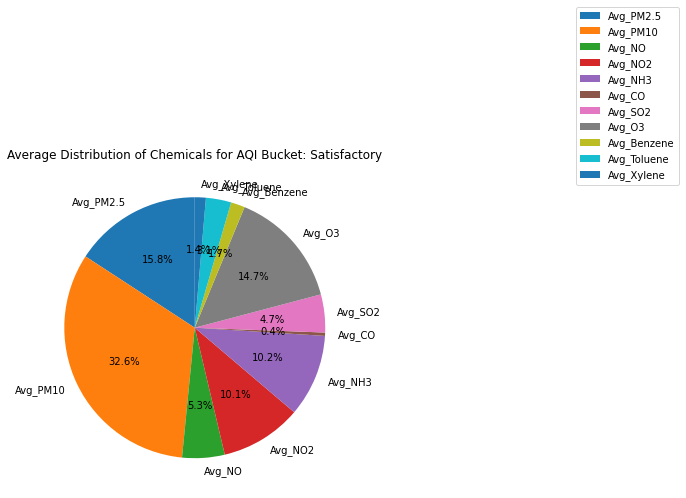

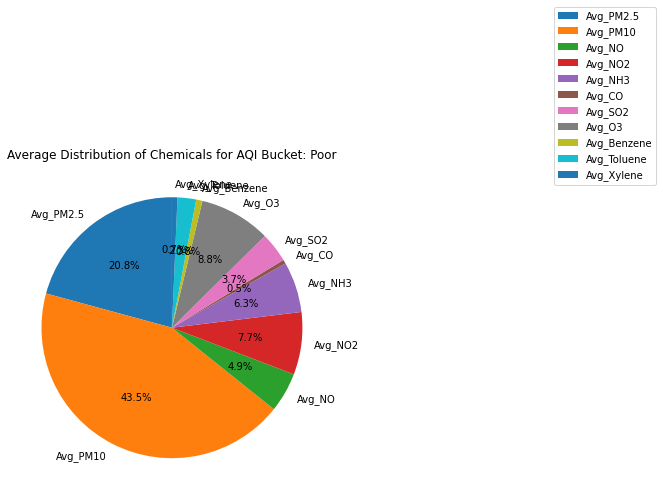

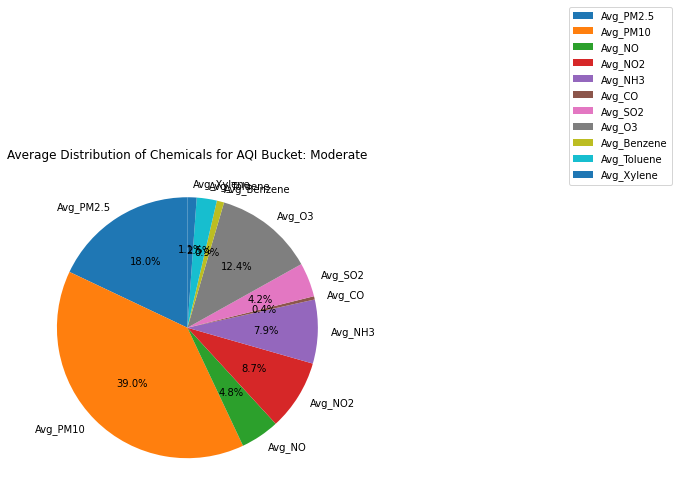

In [0]:
#Vizualization for each category using pie chart
import matplotlib.pyplot as plt

# Converting result DataFrame to pandas DataFrame
avg_data_pd = Avg_Distribution_Data.toPandas()

# Iterating over the rows and create a pie chart for each AQI bucket
for index, row in avg_data_pd.iterrows():
    # Exclude the AQI_Bucket column
    data = row.drop("AQI_Bucket")

    # Creating a pie chart for the current AQI bucket's data
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Average Distribution of Chemicals for AQI Bucket: {row['AQI_Bucket']}")
    plt.legend(loc="upper right", bbox_to_anchor=(2, 1.5))

    # Display the chart
    plt.show()

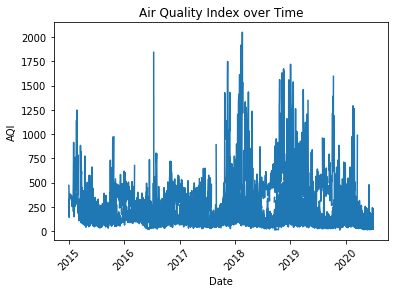

In [0]:
# Time Series Visualization:
import matplotlib.pyplot as plt

# Extract the date and AQI columns from the DataFrame
dates = [row['Date'] for row in df.collect()]
aqi_values = [row['AQI'] for row in df.collect()]

# Plotting the time series
plt.plot(dates, aqi_values)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Air Quality Index over Time')
plt.xticks(rotation=45)
plt.show()

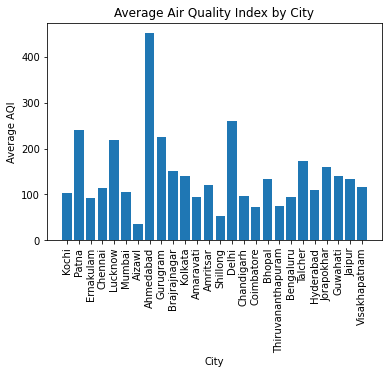

In [0]:
# Bar Chart Visualization:
import matplotlib.pyplot as plt

# Group the data by City and calculate the average AQI
average_aqi_by_city = df.groupBy('City').avg('AQI')

# Extract the city names and average AQI values
cities = [row['City'] for row in average_aqi_by_city.collect()]
average_aqi = [row['avg(AQI)'] for row in average_aqi_by_city.collect()]

# Plotting the bar chart
plt.bar(cities, average_aqi)
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.title('Average Air Quality Index by City')
plt.xticks(rotation=90)
plt.show()